- OpenClassrooms Project 7, Data Scientist
- Author : Oumeima EL GHARBI
- Date : November, December 2022

### Importing libraries

In [1]:
%reset -f

import warnings
warnings.filterwarnings(action="ignore")

# to compute time of pipeline
from time import time, strftime, gmtime

import pandas as pd
from os import listdir
from os.path import isfile, join

import joblib

%matplotlib inline
%autosave 300

Autosaving every 300 seconds


In [2]:
import sys
print("Python version {}.{}.{}".format(str(sys.version_info[0]), str(sys.version_info[1]), str(sys.version_info[2])))

Python version 3.9.7


In [3]:
# Starting time
t0 = time()

input_path = "./dataset/source/"

output_path = "./dataset/cleaned/"

## Part I : Exploratory Data Analysis

#### Importing all datasets

We read the folder in which we have all the csv files.

In [4]:
all_files = [f for f in listdir(input_path) if isfile(join(input_path, f))]

all_csv_files = [file for file in all_files if file.endswith(".csv")]
print(all_files, end='\n\n')

print(all_csv_files)

['application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv']

['application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv']


In [5]:
def load_data(path, filename):
    """
    Step 0)
    :param path:
    :param filename: (string)
    :return:
    """
    print("___Loading raw dataset___")

    # Load raw data
    dataset_file = "{}{}".format(path, filename)
    dataset = pd.read_csv(dataset_file, encoding="windows-1252")

    print("Initial shape :", dataset.shape)
    return dataset

In [6]:
all_datasets = []

for index, dataset_csv in enumerate(all_csv_files):
    name = dataset_csv.split(".")[0]
    #if name.startswith("olist"):
     #   list_name = name.split("_")[1:-1]
      #  name = "_".join(list_name)
    # we make the dataset as a global variable so we can use it later in the notebook
    globals()["dataset_" + name] = load_data(input_path, dataset_csv)

    # we add the dataset to the list of all datasets.
    #all_datasets.append(globals()["dataset_" + name])

    print("This is the dataset n°{} : {}".format(index + 1, name))
    df = globals()["dataset_" + name]
    all_datasets.append(("dataset_" + name, df))
    display(df.head(2))
    display(df.info(verbose=True))

___Loading raw dataset___
Initial shape : (307511, 122)
This is the dataset n°1 : application_train


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

None

___Loading raw dataset___
Initial shape : (1716428, 17)
This is the dataset n°2 : bureau


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


None

___Loading raw dataset___
Initial shape : (27299925, 3)
This is the dataset n°3 : bureau_balance


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


None

___Loading raw dataset___
Initial shape : (3840312, 23)
This is the dataset n°4 : credit_card_balance


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

None

___Loading raw dataset___
Initial shape : (219, 5)
This is the dataset n°5 : HomeCredit_columns_description


,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   219 non-null    int64 
 1   Table        219 non-null    object
 2   Row          219 non-null    object
 3   Description  219 non-null    object
 4   Special      86 non-null     object
dtypes: int64(1), object(4)
memory usage: 8.7+ KB


None

___Loading raw dataset___
Initial shape : (13605401, 8)
This is the dataset n°6 : installments_payments


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


None

___Loading raw dataset___
Initial shape : (10001358, 8)
This is the dataset n°7 : POS_CASH_balance


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


None

___Loading raw dataset___
Initial shape : (1670214, 37)
This is the dataset n°8 : previous_application


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

None

For each dataset, we display its dimension and if it has missing values (NaN)

In [7]:
print("Shape dataset")
for tuple_df in all_datasets :
    print("The dataset called :", tuple_df[0], "has a shape :", tuple_df[1].shape)

Shape dataset
The dataset called : dataset_application_train has a shape : (307511, 122)
The dataset called : dataset_bureau has a shape : (1716428, 17)
The dataset called : dataset_bureau_balance has a shape : (27299925, 3)
The dataset called : dataset_credit_card_balance has a shape : (3840312, 23)
The dataset called : dataset_HomeCredit_columns_description has a shape : (219, 5)
The dataset called : dataset_installments_payments has a shape : (13605401, 8)
The dataset called : dataset_POS_CASH_balance has a shape : (10001358, 8)
The dataset called : dataset_previous_application has a shape : (1670214, 37)


In [8]:
print("Missing values")
for tuple_df in all_datasets :
    df = tuple_df[1]
    print("The dataset called :", tuple_df[0], "has :", round(df.isna().sum().sum() / (df.shape[0] * df.shape[1]) * 100), "% of missing values.")

Missing values
The dataset called : dataset_application_train has : 24 % of missing values.
The dataset called : dataset_bureau has : 14 % of missing values.
The dataset called : dataset_bureau_balance has : 0 % of missing values.
The dataset called : dataset_credit_card_balance has : 7 % of missing values.
The dataset called : dataset_HomeCredit_columns_description has : 12 % of missing values.
The dataset called : dataset_installments_payments has : 0 % of missing values.
The dataset called : dataset_POS_CASH_balance has : 0 % of missing values.
The dataset called : dataset_previous_application has : 18 % of missing values.


In [9]:
dataset_application_train.isna().sum(axis=0)

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [10]:
print("Duplicated rows ?")
for tuple_df in all_datasets:
    print("The dataset called :", tuple_df[0], "has :",tuple_df[1].duplicated().sum(), "duplicated rows.")

Duplicated rows ?
The dataset called : dataset_application_train has : 0 duplicated rows.
The dataset called : dataset_bureau has : 0 duplicated rows.
The dataset called : dataset_bureau_balance has : 0 duplicated rows.
The dataset called : dataset_credit_card_balance has : 0 duplicated rows.
The dataset called : dataset_HomeCredit_columns_description has : 0 duplicated rows.
The dataset called : dataset_installments_payments has : 0 duplicated rows.
The dataset called : dataset_POS_CASH_balance has : 0 duplicated rows.
The dataset called : dataset_previous_application has : 0 duplicated rows.


##### Distribution of the target

<AxesSubplot:ylabel='TARGET'>

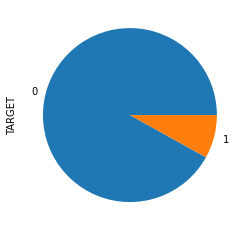

In [11]:
dataset_application_train.TARGET.value_counts(normalize=True).plot(kind="pie")

In [12]:
dataset_application_train.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [13]:
print("SMOTE to do")

SMOTE to do


## Part II : Feature Engineering

##### Kernel for the feature engineering (Kaggle : https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features/script)

In [14]:
from feature_engineering import *
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [15]:
data = pd.read_csv("dataset/cleaned/df_cleaned.csv")

In [16]:
data[data.TARGET.isna()]

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT


In [17]:
data.isna().sum(axis=0)

SK_ID_CURR                               0
TARGET                                   0
CODE_GENDER                              0
FLAG_OWN_CAR                             0
FLAG_OWN_REALTY                          0
                                     ...  
CC_NAME_CONTRACT_STATUS_nan_MAX     220602
CC_NAME_CONTRACT_STATUS_nan_MEAN    220602
CC_NAME_CONTRACT_STATUS_nan_SUM     220602
CC_NAME_CONTRACT_STATUS_nan_VAR     221234
CC_COUNT                            220602
Length: 797, dtype: int64

In [18]:
print(data.shape)
# exclude name column
X = data.loc[:, data.columns != 'TARGET']
print(X.shape)

y = data.TARGET
print(y.shape)

(307507, 797)
(307507, 796)
(307507,)


In [114]:
# We create a training set and a test set (the test set contains 30% of the dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [113]:
# Create arrays and dataframes to store results
oof_preds = np.zeros(df.shape[0])
# sub_preds = np.zeros(test_df.shape[0])

# load model
print("Loading LGBM")
clf_joblib = joblib.load('models/LGBM/LGBMClassifier_fold_0.joblib')

Loading LGBM


In [21]:
data.select_dtypes('object') # we don't have 'object' here but it is just in case.


""
0
1
2
3
4
...
307502
307503
307504
307505


In [26]:
categorical_columns = df.select_dtypes('object').columns
numerical_columns = df.select_dtypes(include='number').columns
#numerical_columns = X.select_dtypes(include='number').columns

print("Shape of categorical variables : ", categorical_columns.shape)
print("Shape of numerical variables :", numerical_columns.shape)

Shape of categorical variables :  (13,)
Shape of numerical variables : (109,)


In [122]:
X_test.iloc[:, 1:]

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
280616,0,1,1,0,112500.0,314100.0,11767.5,225000.0,0.019101,-10005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
147879,0,0,0,0,450000.0,900000.0,85455.0,900000.0,0.019689,-9850,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101811,1,0,0,0,270000.0,528633.0,25560.0,472500.0,0.018634,-19088,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248338,1,0,0,0,81000.0,463500.0,31099.5,463500.0,0.009657,-20133,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160567,1,0,0,0,315000.0,1129500.0,33156.0,1129500.0,0.030755,-19432,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,0,0,0,0,207000.0,630000.0,31500.0,630000.0,0.004849,-23108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79014,1,0,0,0,112500.0,571446.0,18562.5,477000.0,0.009657,-21997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219308,0,0,1,0,180000.0,288562.5,19413.0,261000.0,0.035792,-10511,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136835,0,1,0,0,630000.0,990000.0,42075.0,990000.0,0.025164,-17134,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0


In [135]:
y_pred = clf_joblib.predict_proba(X_test.iloc[:, 1:])[:, 1] # we remove the ID and we take the predict for the class 1

In [136]:
y_pred

array([0.02187136, 0.02672653, 0.03682308, ..., 0.18987261, 0.05676274,
       0.01302819])

In [137]:
# metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix

In [24]:
# End of notebook time
t1 = time()
print("computing time : {:8.6f} sec".format(t1 - t0))
print("computing time : " + strftime('%H:%M:%S', gmtime(t1 - t0)))

TypeError: 'module' object is not callable